<a href="https://colab.research.google.com/github/GuilhermeFogolin/Estudos-Dados-FECAP/blob/main/Aula02_18_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 02 - 18/08/2025 - Projeto em Ciência de Dados**


In [1]:
import pandas as pd

df = pd.read_csv("BASE01.CREDITO.csv", sep=";")

print(df)

     cliente  codigoconcessao situacaopagamento  tempodeatraso      situacao  \
0          1             7616            Normal              0    Adimplente   
1          2              281         Em atraso             95  Inadimplente   
2          3              282            Normal              0    Adimplente   
3          4             7889         Em atraso            106  Inadimplente   
4          5              283            Normal              0    Adimplente   
..       ...              ...               ...            ...           ...   
112      113             1967            Normal              0    Adimplente   
113      114              344            Normal              0    Adimplente   
114      115              345            Normal              0    Adimplente   
115      116              346            Normal              0    Adimplente   
116      117             1825            Normal              0    Adimplente   

    valorcredito    perda       sexo  i

In [2]:
print(df[["codigoconcessao", "perda", "valorcredito"]]) # Imprimindo três colunas

     codigoconcessao    perda valorcredito
0               7616     0,00      3520,00
1                281   866,80      1046,85
2                282     0,00      4550,00
3               7889  2100,00      2625,00
4                283     0,00      1200,00
..               ...      ...          ...
112             1967     0,00      3599,00
113              344     0,00      4800,00
114              345     0,00      2750,00
115              346     0,00      2105,00
116             1825     0,00      3150,00

[117 rows x 3 columns]


In [3]:
# Alterando tipo de coluna str para float

df['perda'] = df['perda'].str.replace(',', '.')
df['perda'] = df['perda'].astype(float)

df['valorcredito'] = df['valorcredito'].str.replace(',', '.')
df['valorcredito'] = df['valorcredito'].astype(float)

df['idade'] = df['idade'].astype(int)

df['gastoscartao'] = df['gastoscartao'].str.replace(',', '.')
df['gastoscartao'] = df['gastoscartao'].astype(float)

In [4]:
print("Ordenando por perda decrescente")
print(df[["cliente", "perda", "valorcredito"]].sort_values(by = "perda", ascending=False))

Ordenando por perda decrescente
     cliente   perda  valorcredito
29        30  5520.0        6900.0
40        41  4941.0        5490.0
63        64  4160.0        5200.0
71        72  3880.0        4850.0
99       100  3760.0        4700.0
..       ...     ...           ...
112      113     0.0        3599.0
113      114     0.0        4800.0
114      115     0.0        2750.0
115      116     0.0        2105.0
116      117     0.0        3150.0

[117 rows x 3 columns]


In [5]:
print("Ordenando por mais de um campo")
print(df[["cliente", "perda", "valorcredito"]].sort_values(by = ["perda", "valorcredito"], ascending= [True, False]))

Ordenando por mais de um campo
    cliente   perda  valorcredito
36       37     0.0        6025.0
9        10     0.0        6000.0
51       52     0.0        6000.0
78       79     0.0        5800.0
81       82     0.0        5800.0
..      ...     ...           ...
99      100  3760.0        4700.0
71       72  3880.0        4850.0
63       64  4160.0        5200.0
40       41  4941.0        5490.0
29       30  5520.0        6900.0

[117 rows x 3 columns]


In [6]:
df_maiores_perdas = (df[["cliente", "perda"]].sort_values(by = ["perda"], ascending= [False]).head(10)) # Top 10 perdas
df_maiores_perdas

,cliente,perda
29,30,5520.0
40,41,4941.0
63,64,4160.0
71,72,3880.0
99,100,3760.0
44,45,3640.0
95,96,3468.5
67,68,3325.0
25,26,3290.0
109,110,3152.0


In [7]:
for i in range(len(df)): # Iterando sobre todo o df
  print("Cliente :", df.iloc[i]["cliente"])
  print("Valor de crédito: R$", df.iloc[i]["valorcredito"])
  print("***********************************")

Cliente : 1
Valor de crédito: R$ 3520.0
***********************************
Cliente : 2
Valor de crédito: R$ 1046.85
***********************************
Cliente : 3
Valor de crédito: R$ 4550.0
***********************************
Cliente : 4
Valor de crédito: R$ 2625.0
***********************************
Cliente : 5
Valor de crédito: R$ 1200.0
***********************************
Cliente : 6
Valor de crédito: R$ 4150.0
***********************************
Cliente : 7
Valor de crédito: R$ 3000.0
***********************************
Cliente : 8
Valor de crédito: R$ 2960.0
***********************************
Cliente : 9
Valor de crédito: R$ 1850.0
***********************************
Cliente : 10
Valor de crédito: R$ 6000.0
***********************************
Cliente : 11
Valor de crédito: R$ 4440.0
***********************************
Cliente : 12
Valor de crédito: R$ 1545.0
***********************************
Cliente : 13
Valor de crédito: R$ 1050.0
***********************************
Cliente

In [8]:
for i in range(len(df)): # Interando com condições
  if df.iloc[i]["valorcredito"] >= 4000:
    print("Client :", df.iloc[i]["cliente"])
    print("Credit value: R$", df.iloc[i]["valorcredito"])
    print("***********************************")

Client : 3
Credit value: R$ 4550.0
***********************************
Client : 6
Credit value: R$ 4150.0
***********************************
Client : 10
Credit value: R$ 6000.0
***********************************
Client : 11
Credit value: R$ 4440.0
***********************************
Client : 16
Credit value: R$ 4214.0
***********************************
Client : 18
Credit value: R$ 4040.0
***********************************
Client : 22
Credit value: R$ 5200.0
***********************************
Client : 23
Credit value: R$ 4600.0
***********************************
Client : 26
Credit value: R$ 4700.0
***********************************
Client : 29
Credit value: R$ 5300.0
***********************************
Client : 30
Credit value: R$ 6900.0
***********************************
Client : 35
Credit value: R$ 4325.0
***********************************
Client : 37
Credit value: R$ 6025.0
***********************************
Client : 38
Credit value: R$ 4500.0
******************************

In [9]:
print(df.count()) # Função agregadora
print(df.count()["cliente"])

cliente              117
codigoconcessao      117
situacaopagamento    117
tempodeatraso        117
situacao             117
valorcredito         117
perda                117
sexo                 117
idade                117
renda                117
numfilhos            117
estadocivil          117
regiao               117
possuiresidencia     117
gastoscartao         117
dtype: int64
117


In [10]:
print(df["valorcredito"].sum()) # Soma

382797.7


In [11]:
print(df["valorcredito"].mean()) # Média

3271.7752136752138


In [12]:
total_cliente = df["cliente"].count()
total_credito = df["valorcredito"].sum()

credito_medio_cliente = total_credito / total_cliente

print(credito_medio_cliente) # Crédito médio por cliente

3271.7752136752138


In [13]:
for i in range(len(df)): # Interando com condições e média
  if df.iloc[i]["valorcredito"] > credito_medio_cliente:
    print("Client :", df.iloc[i]["cliente"])
    print("Credit value: R$", df.iloc[i]["valorcredito"])
    print("***********************************")

Client : 1
Credit value: R$ 3520.0
***********************************
Client : 3
Credit value: R$ 4550.0
***********************************
Client : 6
Credit value: R$ 4150.0
***********************************
Client : 10
Credit value: R$ 6000.0
***********************************
Client : 11
Credit value: R$ 4440.0
***********************************
Client : 16
Credit value: R$ 4214.0
***********************************
Client : 17
Credit value: R$ 3835.5
***********************************
Client : 18
Credit value: R$ 4040.0
***********************************
Client : 22
Credit value: R$ 5200.0
***********************************
Client : 23
Credit value: R$ 4600.0
***********************************
Client : 26
Credit value: R$ 4700.0
***********************************
Client : 27
Credit value: R$ 3500.0
***********************************
Client : 28
Credit value: R$ 3300.0
***********************************
Client : 29
Credit value: R$ 5300.0
*******************************

In [14]:
print("Quantidade de clientes por sexo") # Agrupamento por sexo
print(df[["sexo","cliente"]].groupby(by='sexo').count())

Quantidade de clientes por sexo
           cliente
sexo              
feminino        45
masculino       72


In [15]:
print("Valor de crédito de por sexo")
df_sexo = df[["sexo","valorcredito"]].groupby(by='sexo').sum().reset_index()
print(df_sexo)

Valor de crédito de por sexo
        sexo  valorcredito
0   feminino     155666.35
1  masculino     227131.35


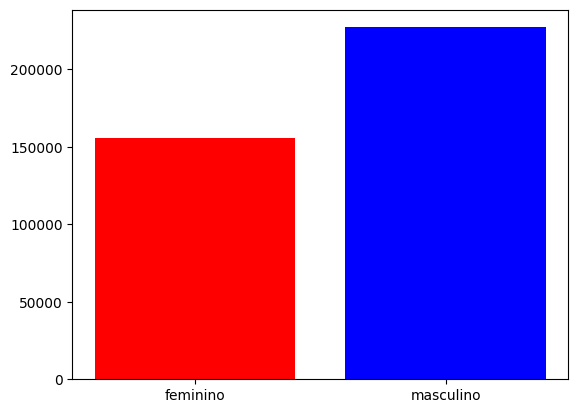

In [16]:
import matplotlib.pyplot as plt

eixo_x = df_sexo["sexo"]
eixo_y = df_sexo["valorcredito"]
plt.bar(eixo_x, eixo_y, color = ["r", "b"])
plt.show()

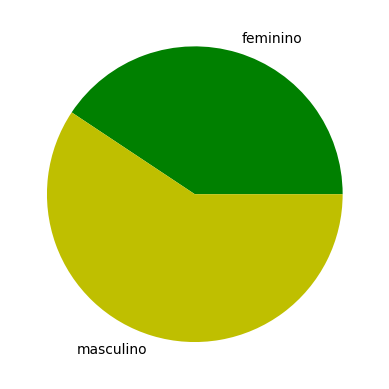

In [17]:
plt.pie(eixo_y, labels = eixo_x, colors = ["g", "y"])
plt.show()

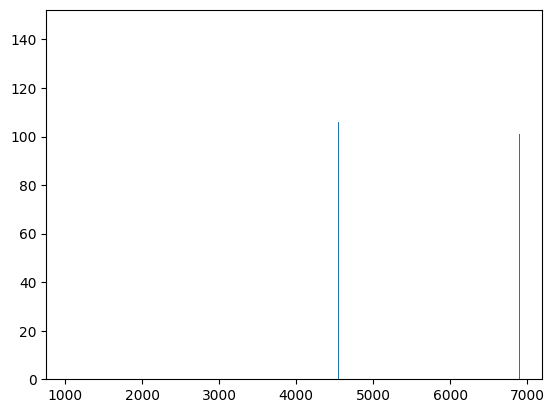

In [18]:
import matplotlib.pyplot as plt

df1 = df[["valorcredito","tempodeatraso"]]
df1 = df1.query("tempodeatraso > 0")
df1 = df1.sort_values(by="valorcredito")
#print(df1)
gdf = df1[["valorcredito","tempodeatraso"]].groupby("valorcredito").mean().reset_index()
#print(gdf)
eixoX = gdf["tempodeatraso"]
eixoY = gdf["valorcredito"]
plt.bar(eixoY, eixoX)
plt.show()

          FaixasCredito  tempodeatraso
0          1 - Até 1800              5
1  2 - De 1801 até 2750              7
2  3 - De 2751 até 3400              4
3     4 - Acima de 3400             18


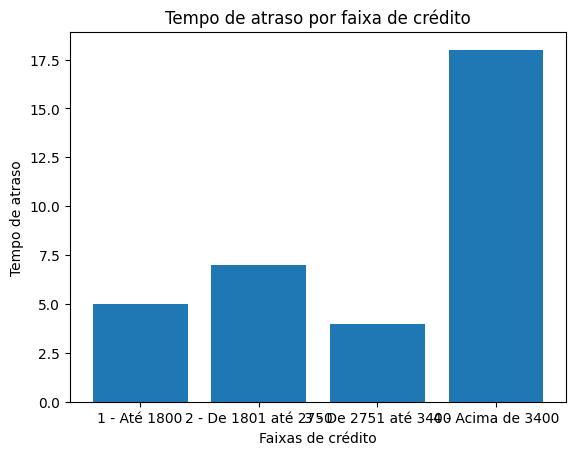

<Figure size 1500x600 with 0 Axes>

In [19]:
faixasCredito=["1 - Até 1800", "2 - De 1801 até 2750", "3 - De 2751 até 3400", "4 - Acima de 3400"]
faixas=[]

for i in range(len(df)):
  if (df.iloc[i]["valorcredito"] <= 1800):
    faixas.append(faixasCredito[0])
  elif (df.iloc[i]["valorcredito"] <= 2750):
    faixas.append(faixasCredito[1])
  elif (df.iloc[i]["valorcredito"] <= 3400):
    faixas.append(faixasCredito[2])
  else:
    faixas.append(faixasCredito[3])

df["FaixasCredito"] = faixas

df1 = df[["FaixasCredito","tempodeatraso"]]
df1 = df1[df1["tempodeatraso"]>0]
df1 = df1.sort_values(by="FaixasCredito")

gdf=df1[["FaixasCredito","tempodeatraso"]].groupby("FaixasCredito").count().reset_index()
print(gdf)

plot_eixoX = gdf["tempodeatraso"]
plot_eixoY = gdf["FaixasCredito"]

plt.bar(plot_eixoY, plot_eixoX)
plt.title("Tempo de atraso por faixa de crédito")
plt.xlabel("Faixas de crédito")
plt.ylabel("Tempo de atraso")
plt.figure(figsize=(15,6))
plt.show()

        FaixasIdade  tempodeatraso
0        1 - Até 25             21
1  2 - De 26 até 50             12
2  3 - De 51 até 75              1


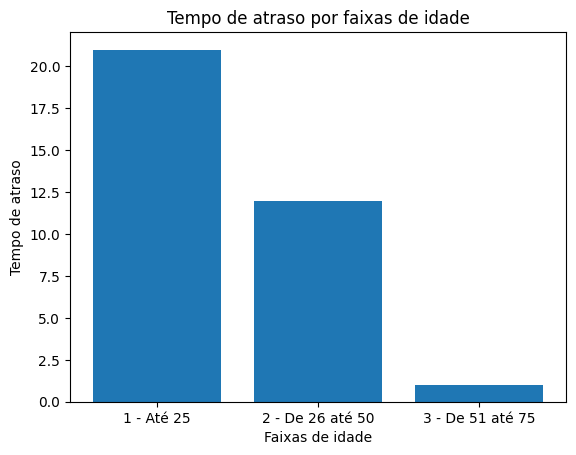

<Figure size 1500x600 with 0 Axes>

In [25]:
faixas_idade = ["1 - Até 25", "2 - De 26 até 50", "3 - De 51 até 75", "4 - Acima de 76"]
faixas = []

for i in range(len(df)):
  if (df.iloc[i]["idade"] <= 25):
    faixas.append(faixas_idade[0])
  elif (df.iloc[i]["idade"] <= 50):
    faixas.append(faixas_idade[1])
  elif (df.iloc[i]["idade"] <= 75):
    faixas.append(faixas_idade[2])
  else:
    faixas.append(faixasCredito[3])

df["FaixasIdade"] = faixas

df1 = df[["FaixasIdade", "tempodeatraso"]]
df1 = df1[df1["tempodeatraso"] > 0]
df1 = df1.sort_values(by = "FaixasIdade")

gdf=df1[["FaixasIdade", "tempodeatraso"]].groupby("FaixasIdade").count().reset_index()
print(gdf)

plot_eixoX = gdf["FaixasIdade"]
plot_eixoY = gdf["tempodeatraso"]

plt.bar(plot_eixoX, plot_eixoY)
plt.title("Tempo de atraso por faixas de idade")
plt.xlabel("Faixas de idade")
plt.ylabel("Tempo de atraso")
plt.figure(figsize=(15,6))
plt.show()